In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format',lambda x:'%0.3f'% x)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('FE_Data_June_2020_May_2022.csv')
df1.head()

,Index,State,Abr,FE_State_Clean,BUSINESS_UNIT,State_Of_Purchase,UniqueSerialNo,Lot_Auc_Code,AUCTION PLACE,SOLD_DATE,Veh Inward Unit,YARD NAME,Yard Unit,LOT NO,Bidder id,Cust Code,NAME,MAKE YEAR,Make,Model,VEHICLE NO,AAA,CHASIS NO,METER READING,SPECIFICATION,ADD NOTE,UCR,SHROT COND,INS DT,TAX,PERMIT,SHOOT PRICE,RESERVE PRICE,SOLD AMOUNT,SERVICE CHARGE,SERVICE TAX,SELLER CORPORATE NAME,Customer_segmentation,SELLER ID,SELLER NAME,KEY REF NUMBER,Inv_H_Category,Inv_H_Rc_Status,SaleType,Sal_Provisional_Dt,Ramped Status,GP_Purpose,GP_DateTime,GP_Created_On,Outward_Date,Sale_Closure_Date,DC_ApproveStat,DC_ApprovedOn,DC_Reason,Inw_Entry_Date,Inw_Created_Date,Fuel Type,Variant_x,VehicleCondition,Vehicle Sub condition,Sale Amount Collected,Zone,Scheme Name,Seller Commission Rate,Make_new,key,matches,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean
0,12,MADHYA PRADESH,MP,MADHYA PRADESH,Bhopal,MADHYA PRADESH,S22010800254,BHP20220416368,Shriram Automall Bhopal,17-04-2022,BHMYD,Shriram Automall Bhopal,BHMYD,52,138,AK0000157742,FAIM KHAN,2006,MAHINDRA,275DI,MP37AA0855,MP,NLB6848,6494,"PB, 3 Cyl, Hyd Air Pipe, PTO",No Battery/Bumper/Sun Visor/Top Link/Draw Bar/...,10%,Avg,Not Available,Not Applicable,Not Available,0.000,0.000,72000,2000,360.000,a9,NBFC,AB000283161,BABU LAL BABULAL,BERAST012190004,FE,Not available,Spot Sale,16-04-2022,Y,Delivery For Buyer,21-04-2022 13:12,21-04-2022 13:11,21-04-2022 20:05,NaN,NaN,NaN,NaN,05-01-2022,08-01-2022 12:31,Diesel,AGRICULTURETRACTOR,Movable,Movable inventory without RC,72000.000,WEST ZONE,Inventory condition based scheme,2.000,MAHINDRA,MAHINDRA275DIAGRICULTURETRACTOR,MAHINDRA275 DIAGRICULTURE TRACTOR,MAHINDRA,275 DI,AGRICULTURE TRACTOR,DIESEL
1,25,BANGALORE,KA,KARNATAKA,Bangalore,KARNATAKA,S22011200110,BGR20220505006,Shriram Automall Bangalore,05-05-2022,BAMYD,Shriram Automall Bangalore,BAMYD,104,137,AR00001785489,CHIKKANNA R,2012,TAFE,MF 1035DI,KA18TA5450,KA,751643,1025,"P/B,3- Cyl, Hyd Pipe.",NaN,20% 30%,Fair,Live : 04/04/2022,Life Time,Not Available,305553.000,275000.000,230000,2300,414.000,NaN,NaN,AS00001816489,NIJALINGAPPA B S,KA18TA5450,FE,Original RC,Subjective Sale,05-05-2022,Y,Delivery For Buyer,09-05-2022 04:19,09-05-2022 16:04,09-05-2022 17:54,NaN,NaN,NaN,NaN,12-01-2022,13-01-2022 17:41,Diesel,AGRICULTURE TRACTOR,Movable,Movable inventory with RC,230000.000,SOUTH ZONE 3,NaN,NaN,TAFE,TAFEMF 1035DIAGRICULTURE TRACTOR,TAFEMF 1035DIAGRICULTURE TRACTOR,TAFE,MF 1035DI,AGRICULTURE TRACTOR,DIESEL
2,32,UTTAR PRADESH,UP,UTTAR PRADESH,Lucknow,UTTAR PRADESH,S21031300079,ALY20210324662,Shriram Automall Lucknow,24-03-2021,LUCYD,Shriram Automall Lucknow,LUCYD,10,243,AK00000349578,RAIS KHAN,2015,EICHER,242,UP34AD2428,UP,9.23E+11,3443,M/T,NaN,25%,FAIR,Not Available,Not Available,Not Available,200000.000,180000.000,165000,2000,360.000,a9,NBFC,AR000344361,RAM MILAN RAM,LKMPRO503200005,FE,Not available,Spot Sale,24-03-2021,Y,Delivery For Buyer,30-03-2021 12:35,30-03-2021 12:37,30-03-2021 12:41,NaN,NaN,NaN,NaN,12-03-2021,13-03-2021 10:56,Diesel,AGRICULTURE TRACTOR,Movable,NaN,165000.000,NORTH EAST CENTRAL ZONE,Standard Scheme,2.000,EICHER,EICHER242AGRICULTURE TRACTOR,EICHER242AGRICULTURE TRACTOR,EICHER,242,AGRICULTURE TRACTOR,DIESEL
3,70,PUNJAB HP and JK,HP,HIMACHAL PRADESH,Bilaspur,PUNJAB,S22031400696,BIL20220511224,Shriram Automall Bilaspur,11-05-2022,BLSYD,Shriram Automall Bilaspur,BLSYD,38,506,AK00001801508,DINESH KUMAR,2012,EICHER,380,HP653463,HP,9.20E+11,2236,"Push Block, , Cabin, Drow Bar, PTO, Tralley 9F...","All Body Minor Dent And Damage, Stepney- Na,",10%,Fair,Live : 28/03/2022,Expired : 31/03/2021,Not Available,NaN,NaN,182500,2000,360.000,a9,NBFC,AK000552921,KAUL KAUL,MNDI1T007310007,FE,RTA Forms,Spot Sale,11-05-2022,Y,Delivery For Buyer,12-05-2022 15:01,12-05-2022 15:01,12-05-2022 16:47,NaN,NaN,NaN,NaN,14-03-2022,14-03-2022 15:51,Diesel,AGRICULTURE TRACTOR,Movable,Movable inventory without RC,182500.000,NORTH WEST ZONE,Inventory condition based scheme,2.000,EICHER,EICHER380AGRICULTURE TRACTOR,EICHER38

In [3]:
df1['METER READING'].value_counts()

CNVU       2015
cnvu         27
CNVM         23
CNUV         17
0             7
           ... 
3028          1
205           1
2467          1
5113          1
5569HRS       1
Name: METER READING, Length: 1476, dtype: int64

In [4]:
df2=pd.read_csv('FE_data_final_segmentation.csv')

df2.head(10)

,UniqueSerialNo,SOLD_DATE,Customer_Segmentation,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,FE_State_Clean,SOLD AMOUNT,State_Of_Purchase
0,S13121500016,17-12-2013 00:00,RETAIL,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,42000.000,ANDHRA PRADESH
1,S12041100007,13-04-2012 16:32,RETAIL,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,110000.000,ANDHRA PRADESH
2,S12040200077,04-03-2012 00:00,RETAIL,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,225000.000,ANDHRA PRADESH
3,S13052700219,08-06-2013 00:00,RETAIL,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,295000.000,ANDHRA PRADESH
4,S12042710009,28-04-2012 18:30,RETAIL,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,215000.000,Andhra Pradesh
5,S12050700863,07-03-2012 00:00,RETAIL,2007.000,INDOFARMEQUIPEMENTLTD,2040DI,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,80000.000,ANDHRA PRADESH
6,S12020300007,04-04-2012 00:00,RETAIL,2007.000,MAHINDRA,575DIBHOOMIPUTRA,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,120000.000,TELANGANA
7,S12060500177,01-05-2013 00:00,RETAIL,2005.000,ESCORTS,FARMTRAC70,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,150000.000,Andhra Pradesh
8,S13120200054,17-12-2013 00:00,RETAIL,2007.000,JOHNDEERE,5103E,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,82000.000,ANDHRA PRADESH
9,S12040200017,04-03-2012 00:00,RETAIL,2003.000,MAHINDRA,475DI,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,105000.000,ANDHRA PRADESH


In [5]:
df1.shape

(4743, 71)

In [6]:
df2.shape

(577716, 11)

In [7]:
df1.isnull().sum()

Index                        0
State                        0
Abr                          0
FE_State_Clean               0
BUSINESS_UNIT                0
State_Of_Purchase            0
UniqueSerialNo               0
Lot_Auc_Code                 0
AUCTION PLACE                0
SOLD_DATE                    0
Veh Inward Unit              0
YARD NAME                    0
Yard Unit                    0
LOT NO                       0
Bidder id                    0
Cust Code                    0
NAME                         0
MAKE YEAR                    0
Make                         0
Model                        0
VEHICLE NO                   0
AAA                          0
CHASIS NO                   34
METER READING             1078
SPECIFICATION              628
ADD NOTE                  1214
UCR                        624
SHROT COND                 296
INS DT                       0
TAX                          0
PERMIT                       1
SHOOT PRICE               2156
RESERVE 

In [8]:
df2.isnull().sum()

UniqueSerialNo               11
SOLD_DATE                    11
Customer_Segmentation        11
MAKE YEAR                    11
Make_Clean                   11
Model_Clean                  11
Variant_Clean                11
Fuel_Clean                   11
FE_State_Clean            13197
SOLD AMOUNT                  11
State_Of_Purchase        187056
dtype: int64

In [9]:
df3=pd.read_csv('New_Book1 FE.csv')

In [10]:
df3.head()

,UniqueSerialNo,SOLD_DATE,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,FE_State_Clean,SOLD AMOUNT,State_Of_Purchase
0,S22010800254,17-04-2022,2006,MAHINDRA,275 DI,AGRICULTURE TRACTOR,DIESEL,MADHYA PRADESH,72000,MADHYA PRADESH
1,S22011200110,05-05-2022,2012,TAFE,MF 1035DI,AGRICULTURE TRACTOR,DIESEL,KARNATAKA,230000,KARNATAKA
2,S21031300079,24-03-2021,2015,EICHER,242,AGRICULTURE TRACTOR,DIESEL,UTTAR PRADESH,165000,UTTAR PRADESH
3,S22031400696,11-05-2022,2012,EICHER,380,AGRICULTURE TRACTOR,DIESEL,HIMACHAL PRADESH,182500,PUNJAB
4,S22051400276,20-05-2022,1998,TAFE,MF 1035DI,AGRICULTURE TRACTOR,DIESEL,RAJASTHAN,122000,HARYANA


In [11]:
df3.shape

(4743, 10)

In [12]:
df3.isnull().sum()

UniqueSerialNo        0
SOLD_DATE             0
MAKE YEAR             0
Make_Clean           21
Model_Clean          21
Variant_Clean        21
Fuel_Clean           21
FE_State_Clean        0
SOLD AMOUNT           0
State_Of_Purchase     0
dtype: int64

In [13]:
df2.shape

(577716, 11)

In [14]:
df3.shape

(4743, 10)

In [15]:
mydata= pd.concat([df2, df3], axis=0)

In [16]:
mydata

,UniqueSerialNo,SOLD_DATE,Customer_Segmentation,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,FE_State_Clean,SOLD AMOUNT,State_Of_Purchase
0,S13121500016,17-12-2013 00:00,RETAIL,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,42000.000,ANDHRA PRADESH
1,S12041100007,13-04-2012 16:32,RETAIL,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,110000.000,ANDHRA PRADESH
2,S12040200077,04-03-2012 00:00,RETAIL,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,225000.000,ANDHRA PRADESH
3,S13052700219,08-06-2013 00:00,RETAIL,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,295000.000,ANDHRA PRADESH
4,S12042710009,28-04-2012 18:30,RETAIL,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,215000.000,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...
4738,S20122100275,29-12-2020,NaN,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,DIESEL,TELANGANA,316000.000,ANDHRA PRADESH
4739,S20080300148,16-10-2020,NaN,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,DIESEL,ANDHRA PRADESH,135000.000,ANDHRA PRADESH
4740,S20100500020,15-12-2020,NaN,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,DIESEL,ANDHRA PRADESH,81000.000,ANDHRA PRADESH
4741,S20100100091,03-11-2020,NaN,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,DIESEL,ANDHRA PRADESH,175000.000,ANDHRA PRADESH


In [17]:
mydata_ = mydata[mydata['MAKE YEAR']>=2005]

In [18]:
mydata_['SOLD AMOUNT'].min()

5000.0

In [19]:
my_data_ = mydata_[mydata_['SOLD AMOUNT']>5000] 

In [20]:
my_data_

,UniqueSerialNo,SOLD_DATE,Customer_Segmentation,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,FE_State_Clean,SOLD AMOUNT,State_Of_Purchase
0,S13121500016,17-12-2013 00:00,RETAIL,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,42000.000,ANDHRA PRADESH
1,S12041100007,13-04-2012 16:32,RETAIL,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,110000.000,ANDHRA PRADESH
2,S12040200077,04-03-2012 00:00,RETAIL,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,225000.000,ANDHRA PRADESH
3,S13052700219,08-06-2013 00:00,RETAIL,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,295000.000,ANDHRA PRADESH
4,S12042710009,28-04-2012 18:30,RETAIL,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,DIESEL,Andhra Pradesh,215000.000,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...
4738,S20122100275,29-12-2020,NaN,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,DIESEL,TELANGANA,316000.000,ANDHRA PRADESH
4739,S20080300148,16-10-2020,NaN,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,DIESEL,ANDHRA PRADESH,135000.000,ANDHRA PRADESH
4740,S20100500020,15-12-2020,NaN,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,DIESEL,ANDHRA PRADESH,81000.000,ANDHRA PRADESH
4741,S20100100091,03-11-2020,NaN,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,DIESEL,ANDHRA PRADESH,175000.000,ANDHRA PRADESH


In [21]:
my_data_.drop(['Fuel_Clean'],axis=1,inplace=True)

In [22]:
my_data_.isnull().sum()

UniqueSerialNo                0
SOLD_DATE                     0
Customer_Segmentation      4517
MAKE YEAR                     0
Make_Clean                   21
Model_Clean                  21
Variant_Clean                21
FE_State_Clean            11361
SOLD AMOUNT                   0
State_Of_Purchase        160599
dtype: int64

In [23]:
my_data_.shape

(501355, 10)

In [24]:
#mydata.drop(['State_Of_Purchase'],axis=1,inplace=True)

In [25]:
my_data_

,UniqueSerialNo,SOLD_DATE,Customer_Segmentation,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD AMOUNT,State_Of_Purchase
0,S13121500016,17-12-2013 00:00,RETAIL,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,Andhra Pradesh,42000.000,ANDHRA PRADESH
1,S12041100007,13-04-2012 16:32,RETAIL,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,Andhra Pradesh,110000.000,ANDHRA PRADESH
2,S12040200077,04-03-2012 00:00,RETAIL,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,Andhra Pradesh,225000.000,ANDHRA PRADESH
3,S13052700219,08-06-2013 00:00,RETAIL,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,Andhra Pradesh,295000.000,ANDHRA PRADESH
4,S12042710009,28-04-2012 18:30,RETAIL,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,Andhra Pradesh,215000.000,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
4738,S20122100275,29-12-2020,NaN,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,TELANGANA,316000.000,ANDHRA PRADESH
4739,S20080300148,16-10-2020,NaN,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,135000.000,ANDHRA PRADESH
4740,S20100500020,15-12-2020,NaN,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,ANDHRA PRADESH,81000.000,ANDHRA PRADESH
4741,S20100100091,03-11-2020,NaN,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,175000.000,ANDHRA PRADESH


In [26]:
my_data_['SOLD_DATE']=my_data_['SOLD_DATE'].str.replace('/','-')

In [27]:
import datetime

In [28]:
my_data_['SOLD_DATE'] = pd.to_datetime(my_data_['SOLD_DATE']).dt.normalize()

In [29]:
#mydata.to_csv('Final_FE_ncs_model_.csv')

In [30]:
my_data_['SOLD_DATE']=pd.to_datetime(my_data_['SOLD_DATE'])

In [31]:
my_data_['day']=my_data_['SOLD_DATE'].apply(lambda x:x.day)
my_data_['month']=my_data_['SOLD_DATE'].apply(lambda x:x.month)
my_data_['Sold_year']=my_data_['SOLD_DATE'].apply(lambda x:x.year)


In [32]:
my_data_

,UniqueSerialNo,SOLD_DATE,Customer_Segmentation,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD AMOUNT,State_Of_Purchase,day,month,Sold_year
0,S13121500016,2013-12-17,RETAIL,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,Andhra Pradesh,42000.000,ANDHRA PRADESH,17,12,2013
1,S12041100007,2012-04-13,RETAIL,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,Andhra Pradesh,110000.000,ANDHRA PRADESH,13,4,2012
2,S12040200077,2012-04-03,RETAIL,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,Andhra Pradesh,225000.000,ANDHRA PRADESH,3,4,2012
3,S13052700219,2013-08-06,RETAIL,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,Andhra Pradesh,295000.000,ANDHRA PRADESH,6,8,2013
4,S12042710009,2012-04-28,RETAIL,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,Andhra Pradesh,215000.000,Andhra Pradesh,28,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,S20122100275,2020-12-29,NaN,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,TELANGANA,316000.000,ANDHRA PRADESH,29,12,2020
4739,S20080300148,2020-10-16,NaN,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,135000.000,ANDHRA PRADESH,16,10,2020
4740,S20100500020,2020-12-15,NaN,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,ANDHRA PRADESH,81000.000,ANDHRA PRADESH,15,12,2020
4741,S20100100091,2020-03-11,NaN,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,175000.000,ANDHRA PRADESH,11,3,2020


In [33]:
my_data_.drop(['SOLD_DATE','day','month','UniqueSerialNo','State_Of_Purchase','Sold_year','Customer_Segmentation'],axis=1,inplace=True)

In [34]:
df4=my_data_.dropna()

In [35]:
df4

,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD AMOUNT
0,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,Andhra Pradesh,42000.000
1,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,Andhra Pradesh,110000.000
2,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,Andhra Pradesh,225000.000
3,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,Andhra Pradesh,295000.000
4,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,Andhra Pradesh,215000.000
...,...,...,...,...,...,...
4738,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,TELANGANA,316000.000
4739,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,135000.000
4740,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,ANDHRA PRADESH,81000.000
4741,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,175000.000


In [36]:
df4.isnull().sum()

MAKE YEAR         0
Make_Clean        0
Model_Clean       0
Variant_Clean     0
FE_State_Clean    0
SOLD AMOUNT       0
dtype: int64

In [37]:
df4

,MAKE YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD AMOUNT
0,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,Andhra Pradesh,42000.000
1,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,Andhra Pradesh,110000.000
2,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,Andhra Pradesh,225000.000
3,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,Andhra Pradesh,295000.000
4,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,Andhra Pradesh,215000.000
...,...,...,...,...,...,...
4738,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,TELANGANA,316000.000
4739,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,135000.000
4740,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,ANDHRA PRADESH,81000.000
4741,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,175000.000


In [38]:
#df5=df4.drop(['Make_Clean','Model_Clean','Variant_Clean','State_Of_Purchase'],axis=1)

In [39]:
#df4.drop(['Make_Clean','Variant_Clean'],axis=1,inplace=True)
#df4

In [40]:
#df4['Vehicle_Age']=df4['Sold_year']-df4['MAKE YEAR']

In [41]:
#df4

In [42]:
#df5=df4.drop(['Sold_year'],axis=1)

In [43]:
df4.columns=[c.replace(" ","_")for c in df4.columns]

In [44]:
df4

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD_AMOUNT
0,2007.000,FORCE,BALWAN450,AGRICULTURE TRACTOR,Andhra Pradesh,42000.000
1,2006.000,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,Andhra Pradesh,110000.000
2,2009.000,SWARAJ,735FE,AGRICULTURE TRACTOR,Andhra Pradesh,225000.000
3,2011.000,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,Andhra Pradesh,295000.000
4,2008.000,SWARAJ,744FE,AGRICULTURE TRACTOR,Andhra Pradesh,215000.000
...,...,...,...,...,...,...
4738,2016.000,SWARAJ,735 FE,AGRICULTURE TRACTOR,TELANGANA,316000.000
4739,2009.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,135000.000
4740,2008.000,MAHINDRA,575DI,AGRICULTURE TRACTOR,ANDHRA PRADESH,81000.000
4741,2012.000,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,175000.000


In [45]:
#df5=df4.drop_duplicates()

In [46]:
df4['MAKE_YEAR'] = df4['MAKE_YEAR'].astype(int)

In [47]:
df4

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD_AMOUNT
0,2007,FORCE,BALWAN450,AGRICULTURE TRACTOR,Andhra Pradesh,42000.000
1,2006,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,Andhra Pradesh,110000.000
2,2009,SWARAJ,735FE,AGRICULTURE TRACTOR,Andhra Pradesh,225000.000
3,2011,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,Andhra Pradesh,295000.000
4,2008,SWARAJ,744FE,AGRICULTURE TRACTOR,Andhra Pradesh,215000.000
...,...,...,...,...,...,...
4738,2016,SWARAJ,735 FE,AGRICULTURE TRACTOR,TELANGANA,316000.000
4739,2009,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,135000.000
4740,2008,MAHINDRA,575DI,AGRICULTURE TRACTOR,ANDHRA PRADESH,81000.000
4741,2012,MAHINDRA,475DI BHOOMIPUTRA,AGRICULTURE TRACTOR,ANDHRA PRADESH,175000.000


In [48]:
import re

In [49]:
df4.Model_Clean = df4.Model_Clean .map(lambda x: x.replace('.', '').replace(' ', '')) 

In [50]:
df4['Model_Clean'].unique()

array(['BALWAN450', 'POWERTRAC439', '735FE', 'FARMTRAC65', '744FE',
       '2040DI', '575DIBHOOMIPUTRA', 'FARMTRAC70', '5103E', 'DI740',
       '475DI', '5104', 'POWERTRAC434', '897HARVESTER', '575DI', '5060E',
       '3522', '5041C', '275DI', 'POWERTRAC429', '380', 'DI735',
       'FARMTRAC60', 'MF1035DI', '3030', '3022', 'FARMTRAC45',
       '475DIBHOOMIPUTRA', '265DI', 'DI745III', '5103', '5310', '605DI',
       '445DI', '4022', '3230', '3130', '3040DI', 'MF241DI', '480', '242',
       '295DI', '475DISARPANCH', '5038D', 'DI745', '3630', '325JOSH',
       '255DI', 'SHAKTIMAAN45', '5204', 'FARMTRAC39', '733FE', '5103S',
       'DI35', 'MF5245DI', '834FE', '843XM', '5150', '5042D', '595DI',
       '485', '5500', 'POWERTRAC445', 'SHAKTIMAAN35', '312',
       'POWERTRAC440', 'MF241DIPLANETARYDRIVE', 'DI730', 'POWERTRAC435',
       'POWERTRAC430', '333', '235DI', 'POWERTRAC4455BTPLUS', 'MF245DI',
       '4710', '3037', 'DI42RX', '955', 'SHAKTIMAAN453', '3600',
       'MF5245DIMAHAMAHAAN',

In [51]:
df4['Variant_Clean'].value_counts()

AGRICULTURE TRACTOR    278260
agriculturetractor     203942
HARVESTER                5186
harvester                2464
COMBINED HARVESTER         57
combinedharvester          54
ROTOSEEDER                  6
ROTARY TILLER               3
STRAW REAPER                1
Name: Variant_Clean, dtype: int64

In [52]:
df4['Variant_Clean'].replace({'agriculturetractor': 'AGRICULTURE TRACTOR', 'harvester': 'HARVESTER','combinedharvester':'COMBINED HARVESTER','COMBINED HARVESTER':'COMBINED HARVESTER'},
                              inplace = True)

In [53]:
df4['Variant_Clean'].value_counts()

AGRICULTURE TRACTOR    482202
HARVESTER                7650
COMBINED HARVESTER        111
ROTOSEEDER                  6
ROTARY TILLER               3
STRAW REAPER                1
Name: Variant_Clean, dtype: int64

In [54]:
df4['FE_State_Clean'].value_counts()

Andhra Pradesh            114301
Tamil Nadu                 75224
Karnataka                  55486
Rajasthan                  45528
Maharashtra                38146
Madhya Pradesh             32255
Chhattisgarh               25314
Uttar Pradesh              22081
Telangana                  14726
Punjab                     11277
Gujarat                     9577
West Bengal                 8604
Haryana                     8440
Bihar                       7619
Assam                       7118
Jharkhand                   5297
Odisha                      1452
Jammu And Kashmir           1213
ANDHRA PRADESH              1095
TAMIL NADU                   597
Kerala                       476
Puducherry                   471
KARNATAKA                    430
Himachal Pradesh             423
TELANGANA                    369
Uttarakhand                  363
RAJASTHAN                    359
MADHYA PRADESH               343
MAHARASHTRA                  328
CHHATTISGARH                 186
UTTAR PRAD

In [55]:
df4['FE_State_Clean'].replace({'Andhra Pradesh':'ANDHRA PRADESH', 'Tamil Nadu': 'TAMIL NADU','Karnataka':'KARNATAKA','Rajasthan':'RAJASTHAN','Maharashtra':'MAHARASHTRA','Madhya Pradesh':'MADHYA PRADESH','Uttar Pradesh':'UTTAR PRADESH','Chhattisgarh':'CHHATTISGARH','Kerala':'KERALA','Delhi':'DELHI','Jammu And Kashmir':'JAMMU AND KASHMIR','Himachal Pradesh':'HIMACHAL PRADESH','Puducherry':'PONDICHERRY','Odisha':'ODISHA','Punjab':'PUNJAB','Gujarat':'GUJARAT','Jharkhand':'JHARKHAND','Tamil nadu': 'TAMIL NADU','Haryana':'HARYANA','Telangana':'TELANGANA','Bihar':'BIHAR'},
                              inplace = True)
                           

In [56]:
df4['FE_State_Clean'].value_counts()

ANDHRA PRADESH            115396
TAMIL NADU                 75825
KARNATAKA                  55916
RAJASTHAN                  45887
MAHARASHTRA                38474
MADHYA PRADESH             32598
CHHATTISGARH               25500
UTTAR PRADESH              22237
TELANGANA                  15095
PUNJAB                     11396
GUJARAT                     9676
West Bengal                 8604
HARYANA                     8561
BIHAR                       7702
Assam                       7118
JHARKHAND                   5327
ODISHA                      1480
JAMMU AND KASHMIR           1228
KERALA                       486
PONDICHERRY                  472
HIMACHAL PRADESH             430
Uttarakhand                  363
ASSAM                         51
WEST BENGAL                   40
Dadar And Nagar Haveli        28
Ladakh                        27
Mizoram                       24
DELHI                         12
PUNJAB                         7
Tripura                        6
Chandigarh

In [57]:
#df['column_name'].replace({'yes': 0, 'no': 1},inplace = True)
                           

In [58]:
from scipy import stats


In [59]:
# upper = Q3 +1.5*IQR

# lower = Q1 – 1.5*IQR

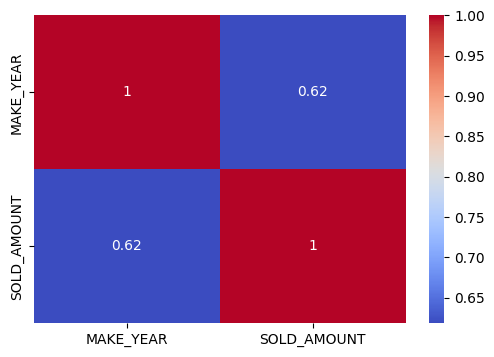

In [60]:
plt.figure(figsize=(6,4))
correlations=df4.corr()
sns.heatmap(correlations,cmap='coolwarm',annot=True)
plt.show()

In [61]:
df5=df4.drop(['SOLD_AMOUNT'],axis=1)

In [62]:
x=df5
y=df4.SOLD_AMOUNT

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=122)

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [65]:
ohe=OneHotEncoder()
ohe.fit(x[['Make_Clean','Model_Clean','Variant_Clean','FE_State_Clean']])

OneHotEncoder()

In [66]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make_Clean','Model_Clean','Variant_Clean','FE_State_Clean']),remainder='passthrough')

In [67]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['ACE', 'AKASHEQUIPMENTS&MACHINERIESPRIVATELIMITED',
       'CAPTAIN TRACTORS PVT LTD', 'CAPTAINTRACTORSPVTLTD', 'CLAAS',
       'DASMESHMEC', 'EICHER', 'ESCORTS', 'FARMTRAC', 'FORCE',
       'GROMAX AGRI EQUIPMENT LTD', 'GROMAXAGRIEQUIPMENTLTD', 'HINDAGRO',
       'HMT', 'INDOFARM EQUIPEMENT L...
       'HARYANA', 'HARYANA ', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR',
       'JHARKHAND', 'KARNATAKA', 'KERALA', 'Ladakh', 'MADHYA PRADESH',
       'MAHARASHTRA', 'Mizoram', 'ODISHA', 'PONDICHERRY', 'PUNJAB',
       'PUNJAB ', 'RAJASTHAN', 'TAMIL NADU', 'TELANGANA', 'Tripura',
       'UTTAR PRADESH', 'UTTARAKHAND', 'Uttarakhand', 'WEST BENGAL',
       'West Bengal'], dtype=object)]),
                                 ['Make_Clean', 'Model_Clean', 'Variant_Clean',
                                  'FE_State_Clean'])])

In [68]:
from xgboost import XGBRegressor

regressor=XGBRegressor(max_depth=15,learning_rate=0.01,
                   n_estimators=5000,
                   objective='reg:linear',
                   booster='gbtree')

In [69]:
pipe=make_pipeline(column_trans,regressor)

In [70]:
pipe.fit(x_train,y_train)

[12:15:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ACE', 'AKASHEQUIPMENTS&MACHINERIESPRIVATELIMITED',
       'CAPTAIN TRACTORS PVT LTD', 'CAPTAINTRACTORSPVTLTD', 'CLAAS',
       'DASMESHMEC', 'EICHER', 'ESCORTS', 'FARMTRAC', 'FORCE',
       'GROMAX AGRI EQUIPMENT LTD', 'GROMAXAGRIEQUIPMENTLTD',...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.01, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=15, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
                              objective='reg:linear', predictor='auto',
                              random_state=0, reg_alpha=0, ...))])

In [71]:
y_pred=pipe.predict(x_test)
y_pred

array([299283.3  , 218293.62 , 504983.53 , ..., 113860.875, 131720.94 ,
       287590.97 ], dtype=float32)

In [72]:
y_train_pred=pipe.predict(x_train)
y_train_pred

array([177946.98,  60577.77,  97100.56, ..., 101254.21, 185698.06,
       478258.75], dtype=float32)

In [73]:
r2_score(y_train,y_train_pred)

0.8550801006768205

In [74]:
r2_score(y_test,y_pred)

0.8494914126685749

In [75]:
import pickle

In [76]:
pickle.dump(pipe,open('regressor_FE_NCS.pkl','wb'))

In [77]:
df4.head(5)

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,FE_State_Clean,SOLD_AMOUNT
0,2007,FORCE,BALWAN450,AGRICULTURE TRACTOR,ANDHRA PRADESH,42000.000
1,2006,ESCORTS,POWERTRAC439,AGRICULTURE TRACTOR,ANDHRA PRADESH,110000.000
2,2009,SWARAJ,735FE,AGRICULTURE TRACTOR,ANDHRA PRADESH,225000.000
3,2011,ESCORTS,FARMTRAC65,AGRICULTURE TRACTOR,ANDHRA PRADESH,295000.000
4,2008,SWARAJ,744FE,AGRICULTURE TRACTOR,ANDHRA PRADESH,215000.000


In [78]:
pipe.predict(pd.DataFrame(columns=['MAKE_YEAR','Make_Clean','Model_Clean','Variant_Clean','FE_State_Clean'],data=np.array([2011,'ESCORTS','FARMTRAC65','AGRICULTURE TRACTOR','ANDHRA PRADESH']).reshape(1,5)))

array([171393.6], dtype=float32)

In [79]:
df4.to_csv('FE_NCS_.csv')

In [80]:
df4['Variant_Clean'].value_counts()

AGRICULTURE TRACTOR    482202
HARVESTER                7650
COMBINED HARVESTER        111
ROTOSEEDER                  6
ROTARY TILLER               3
STRAW REAPER                1
Name: Variant_Clean, dtype: int64

In [81]:
df_new = pd.read_csv("FE_NCS_.csv")

In [82]:
df_new.columns

Index(['Unnamed: 0', 'MAKE_YEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean',
       'FE_State_Clean', 'SOLD_AMOUNT'],
      dtype='object')